In [129]:
import numpy as np
from sklearn.model_selection import train_test_split

class Bagging(object):
    def __init__(self, base_estimator , n_estimators):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        
    def predict(self,x):
        liste = []
        for classifier in self.list_estimators:
            liste.append(classifier.predict(x))
        liste = np.array(liste)
        return [np.argmax(np.bincount(l))for l in liste.T]
        
    
    def fit(self,X,y):
        self.list_estimators = []
        for n in range(self.n_estimators):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
            self.list_estimators.append(self.base_estimator.fit(X_train,y_train))
    
    def score(self,X,y):
        pred = self.predict(X)
        #print(pred)
        return np.mean(pred == y)
    
from sklearn import tree
from sklearn.datasets import load_iris, load_breast_cancer
#iris = load_iris()
data = load_breast_cancer()
X = data.data
y = data.target
#y = [-1 if x==0 else 1 for x in y]

#print(y)

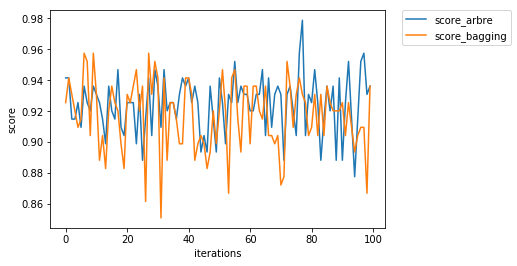

In [128]:
import matplotlib.pyplot as plt

score_bagging = []
score_arbre = []
iteration = 100
b = Bagging(tree.DecisionTreeClassifier(),15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
b.fit(X_train,y_train)
for i in range(iteration):
    b = Bagging(tree.DecisionTreeClassifier(),15)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    b.fit(X_train,y_train)
    score_bagging.append(b.score(X_test,y_test))
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train, y_train)
    score_arbre.append(clf.score(X_test,y_test))
    
    
plt.plot(range(iteration),score_arbre, label= 'score_arbre')
plt.plot(range(iteration),score_bagging, label= 'score_bagging')
plt.xlabel('iterations')
plt.ylabel("score")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



In [165]:
#data = load_breast_cancer()
#X = data.data
#y = data.target
#y = [-1 if x==0 else 1 for x in y]

X, y = make_hastie_10_2()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

d = [1.0/len(X_train) for i in range(len(X_train)) ]

T = 10

def get_error_rate(pred, Y):
    return sum(pred != Y) / float(len(Y))


pred_train, pred_test = [np.zeros(len(X_train)), np.zeros(len(X_test))]

for i in range(T):
    clf_tree = tree.DecisionTreeClassifier(max_depth = 1, random_state = 1)
    # Fit un classifier avec un poids specifique 
    clf_tree.fit(X_train,y_train, sample_weight=d)
    pred_train_i = clf_tree.predict(X_train)
    pred_test_i = clf_tree.predict(X_test)
    # Indicator function
    miss = [int(x) for x in (pred_train_i != Y_train)]
     # Equivalent with 1/-1 to update weights
    miss2 = [x if x==1 else -1 for x in miss]
    # Error
    err_m = np.dot(w,miss) / sum(w)
    # Alpha
    alpha_m = 0.5 * np.log( (1 - err_m) / float(err_m))
    # New weights
    w = np.multiply(w, np.exp([float(x) * alpha_m for x in miss2]))
    # Add to prediction
    pred_train = [sum(x) for x in zip(pred_train, 
                                          [x * alpha_m for x in pred_train_i])]
    pred_test = [sum(x) for x in zip(pred_test, 
                                         [x * alpha_m for x in pred_test_i])]
    
    pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
    # Return error rate in train and test set
    a =  get_error_rate(pred_train, Y_train)
    b =    get_error_rate(pred_test, Y_test)
    
print(a)
print(b)
    

c:\python27\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


TypeError: 'bool' object is not iterable

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_hastie_10_2
import matplotlib.pyplot as plt

""" HELPER FUNCTION: GET ERROR RATE ========================================="""
def get_error_rate(pred, Y):
    return sum(pred != Y) / float(len(Y))

""" HELPER FUNCTION: PRINT ERROR RATE ======================================="""
def print_error_rate(err):
    print 'Error rate: Training: %.4f - Test: %.4f' % err

""" HELPER FUNCTION: GENERIC CLASSIFIER ====================================="""
def generic_clf(Y_train, X_train, Y_test, X_test, clf):
    clf.fit(X_train,Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return get_error_rate(pred_train, Y_train), \
           get_error_rate(pred_test, Y_test)
    
""" ADABOOST IMPLEMENTATION ================================================="""
def adaboost_clf(Y_train, X_train, Y_test, X_test, M, clf):
    n_train, n_test = len(X_train), len(X_test)
    # Initialize weights
    w = np.ones(n_train) / n_train
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]
    
    for i in range(M):
        # Fit a classifier with the specific weights
        clf.fit(X_train, Y_train, sample_weight = w)
        pred_train_i = clf.predict(X_train)
        pred_test_i = clf.predict(X_test)
        # Indicator function
        miss = [int(x) for x in (pred_train_i != Y_train)]
        # Equivalent with 1/-1 to update weights
        miss2 = [x if x==1 else -1 for x in miss]
        # Error
        err_m = np.dot(w,miss) / sum(w)
        # Alpha
        alpha_m = 0.5 * np.log( (1 - err_m) / float(err_m))
        # New weights
        w = np.multiply(w, np.exp([float(x) * alpha_m for x in miss2]))
        # Add to prediction
        pred_train = [sum(x) for x in zip(pred_train, 
                                          [x * alpha_m for x in pred_train_i])]
        pred_test = [sum(x) for x in zip(pred_test, 
                                         [x * alpha_m for x in pred_test_i])]
    
    pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
    # Return error rate in train and test set
    return get_error_rate(pred_train, Y_train), \
           get_error_rate(pred_test, Y_test)

""" PLOT FUNCTION ==========================================================="""
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame([er_train, er_test]).T
    df_error.columns = ['Training', 'Test']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6),
            color = ['lightblue', 'darkblue'], grid = True)
    plot1.set_xlabel('Number of iterations', fontsize = 12)
    plot1.set_xticklabels(range(0,450,50))
    plot1.set_ylabel('Error rate', fontsize = 12)
    plot1.set_title('Error rate vs number of iterations', fontsize = 16)
    plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')

    
from sklearn import tree
from sklearn.datasets import load_iris
iris = load_iris()
#X = iris.data
#y = iris.target

# Read data
x, y = make_hastie_10_2()
print(len(x[0]))
print(len(y))


# Split into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33)

# Fit a simple decision tree first
clf_tree = DecisionTreeClassifier(max_depth = 1, random_state = 1)
clf_tree.fit(X_train,Y_train)
print(clf_tree.score(X_test,Y_test))
er_tree = generic_clf(Y_train, X_train, Y_test, X_test, clf_tree)
print(er_tree)
# Fit Adaboost classifier using a decision tree as base estimator
# Test with different number of iterations
er_train, er_test = [er_tree[0]], [er_tree[1]]
x_range = range(10, 410, 10)
for i in x_range:    
        er_i = adaboost_clf(Y_train, X_train, Y_test, X_test, i, clf_tree)
        er_train.append(er_i[0])
        er_test.append(er_i[1])
    
# Compare error rate vs number of iterations
plot_error_rate(er_train, er_test)
plt.show()

10
12000


NameError: name 'train_test_split' is not defined